In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 读取 data_format_timestamp.h5 文件，时间是时间戳形式
df = pd.read_hdf('./data/data_format_timestamp.h5','df')
print(df.dtypes)
df.head()

STA_DATETIME    float64
STATION_ID        int64
LATITUDE        float64
LONGITUDE       float64
VOLUME          float64
OCC             float64
SPEED           float64
NUM_SAMPLES       int64
dtype: object


,STA_DATETIME,STATION_ID,LATITUDE,LONGITUDE,VOLUME,OCC,SPEED,NUM_SAMPLES
0,1.199117e+09,400000,38.081167,-122.547606,62.0,0.0,64.0,0
1,1.199117e+09,400000,38.081167,-122.547606,46.0,0.0,64.0,0
2,1.199117e+09,400000,38.081167,-122.547606,68.0,0.0,65.0,0
3,1.199118e+09,400000,38.081167,-122.547606,86.0,0.0,65.0,0
4,1.199118e+09,400000,38.081167,-122.547606,95.0,0.0,64.0,0


#### 选取某天的数据

In [3]:
from datetime import *

In [4]:
# 生成datetime
# t = datetime.strptime("2008-01-02 00:00:00", "%Y-%m-%d %H:%M:%S")

In [5]:
# 生成timestamp
t1 = datetime.strptime("2008-01-01 00:00:00", "%Y-%m-%d %H:%M:%S").timestamp()

In [6]:
t2 = datetime.strptime("2008-01-02 00:00:00", "%Y-%m-%d %H:%M:%S").timestamp()

In [7]:
# 取得所需数据
data_1 = df[(df.STA_DATETIME<t2) & (df.STA_DATETIME>=t1)]

In [8]:
# 索引可重设
data_1.head()

,STA_DATETIME,STATION_ID,LATITUDE,LONGITUDE,VOLUME,OCC,SPEED,NUM_SAMPLES
0,1.199117e+09,400000,38.081167,-122.547606,62.0,0.0,64.0,0
1,1.199117e+09,400000,38.081167,-122.547606,46.0,0.0,64.0,0
2,1.199117e+09,400000,38.081167,-122.547606,68.0,0.0,65.0,0
3,1.199118e+09,400000,38.081167,-122.547606,86.0,0.0,65.0,0
4,1.199118e+09,400000,38.081167,-122.547606,95.0,0.0,64.0,0


In [9]:
# 重设索引
data_1.index=list(range(len(data_1)))
data_1.head()

,STA_DATETIME,STATION_ID,LATITUDE,LONGITUDE,VOLUME,OCC,SPEED,NUM_SAMPLES
0,1.199117e+09,400000,38.081167,-122.547606,62.0,0.0,64.0,0
1,1.199117e+09,400000,38.081167,-122.547606,46.0,0.0,64.0,0
2,1.199117e+09,400000,38.081167,-122.547606,68.0,0.0,65.0,0
3,1.199118e+09,400000,38.081167,-122.547606,86.0,0.0,65.0,0
4,1.199118e+09,400000,38.081167,-122.547606,95.0,0.0,64.0,0


In [10]:
# 查看数据信息，有缺失值
print('数据形状：',data_1.shape)
print('--------------------------')
print('数据信息：')
data_1.info()

数据形状： (347328, 8)
--------------------------
数据信息：
<class 'pandas.core.frame.DataFrame'>
Int64Index: 347328 entries, 0 to 347327
Data columns (total 8 columns):
STA_DATETIME    347328 non-null float64
STATION_ID      347328 non-null int64
LATITUDE        347328 non-null float64
LONGITUDE       347328 non-null float64
VOLUME          346464 non-null float64
OCC             346464 non-null float64
SPEED           344736 non-null float64
NUM_SAMPLES     347328 non-null int64
dtypes: float64(6), int64(2)
memory usage: 23.8 MB


In [11]:
# 缺失 VOLUME 的数据同时也缺失 OCC, 并且也都缺失 SPEED
print(data_1[data_1.VOLUME.isnull()].shape[0],\
      data_1[data_1.VOLUME.isnull() & data_1.OCC.isnull()].shape[0],\
      data_1[data_1.VOLUME.isnull() & data_1.OCC.isnull() & data_1.SPEED.isnull()].shape[0])

864 864 864


In [12]:
# 丢弃缺失值,并重设索引
data_1 = data_1.loc[(data_1.SPEED.notnull())]
data_1.index = list(range(len(data_1)))
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344736 entries, 0 to 344735
Data columns (total 8 columns):
STA_DATETIME    344736 non-null float64
STATION_ID      344736 non-null int64
LATITUDE        344736 non-null float64
LONGITUDE       344736 non-null float64
VOLUME          344736 non-null float64
OCC             344736 non-null float64
SPEED           344736 non-null float64
NUM_SAMPLES     344736 non-null int64
dtypes: float64(6), int64(2)
memory usage: 23.7 MB


In [13]:
# # 填充缺失值（暴力方法）
# data_1.VOLUME.fillna(data_1.VOLUME.mean(),inplace=True)
# data_1.OCC.fillna(data_1.OCC.mean(),inplace=True)
# data_1.SPEED.fillna(data_1.SPEED.mean(),inplace=True)
# data_1.info()

In [14]:
# # 填充缺失值（机器学习方法）
# from sklearn.ensemble import RandomForestRegressor
# print ('随机森林预测缺失VOLUME,OCC：--start--')
# data_for_VO_exit = data_1.loc[(data_1.SPEED.notnull())]  # 速度不缺失的数据


In [15]:
# # 画出所有 STATION_ID 相距100 的速度图
# cm = plt.cm.get_cmap('RdYlBu')
# for a in np.arange(data_1.STATION_ID.min(),data_1.STATION_ID.max(),100):
#     data_1[(data_1.STATION_ID < a+100) & (data_1.STATION_ID > a)].plot(x=data_1.columns[0],y=data_1.columns[1],c = data_1.columns[6],kind='scatter',cmap=cm, s = 1)

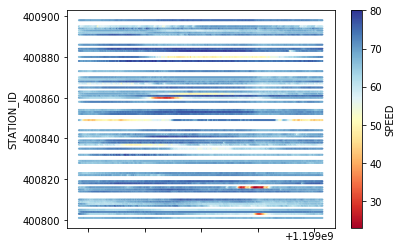

In [16]:
# 可视化数据 2D
cm = plt.cm.get_cmap('RdYlBu')
data_plot2d = data_1[(data_1.STATION_ID < 400900) & (data_1.STATION_ID > 400800)]
data_plot2d.plot(x=data_1.columns[0],y=data_1.columns[1],c = data_1.columns[6],kind='scatter',cmap=cm, s = 1)

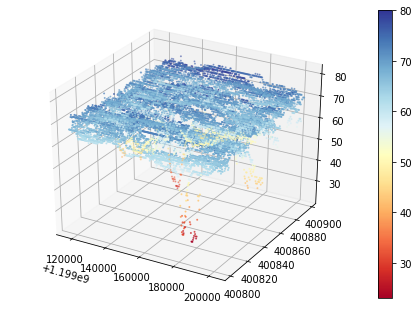

In [17]:
# 可视化数据 3D
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
cm = plt.cm.get_cmap('RdYlBu')

data_plot3d = data_1[(data_1.STATION_ID < 400900) & (data_1.STATION_ID > 400800)]
X = data_plot3d.STA_DATETIME
Y = data_plot3d.STATION_ID
Z = data_plot3d.SPEED
sc = ax.scatter3D(X, Y, Z, c=Z, cmap=cm, s = 1)
plt.colorbar(sc)
#存成图片，支持png格式
# dpi每英寸长度的点数,画出的三维图是矢量图，可以设置保存的dpi
# plt.savefig('./res/3d_fig.png',dpi=200)

#### 处理日期时间，使数据从 0 开始

In [18]:
t_start = data_1.STA_DATETIME.min()
if (data_1.STA_DATETIME.min() > 0):
    data_1.STA_DATETIME = data_1.STA_DATETIME - t_start

In [19]:
data_1.head()

,STA_DATETIME,STATION_ID,LATITUDE,LONGITUDE,VOLUME,OCC,SPEED,NUM_SAMPLES
0,0.0,400000,38.081167,-122.547606,62.0,0.0,64.0,0
1,300.0,400000,38.081167,-122.547606,46.0,0.0,64.0,0
2,600.0,400000,38.081167,-122.547606,68.0,0.0,65.0,0
3,900.0,400000,38.081167,-122.547606,86.0,0.0,65.0,0
4,1200.0,400000,38.081167,-122.547606,95.0,0.0,64.0,0


In [20]:
# data_1.to_hdf('./data/data_final.h5','df')